<p> <img src="../imagens/LOGO_2.png"  align="midle"></p>


**Data Science**<br>

*profmauricioeloy@gmail.com <br>*

<h1 style="background-color:#084d6e;font-family:newtimeroman;font-size:300%;color:white;text-align:center;border-radius: 15px 50px">Exercício 1</h1>

---

Explique o motivo do algoritmo KNN ser considerado um algoritmo preguiçoso.

---

**Resposta:**

O algoritmo KNN é tido como um algoritmo preguiçoso por não aprender sobre os dados, ele apenas os memoriza e quando precisa classificar um novo exemplo usa esses dados memorizados.

<h1 style="background-color:#084d6e;font-family:newtimeroman;font-size:300%;color:white;text-align:center;border-radius: 15px 50px">Exercício 2</h1>

---

Por que é necessário padronizar os dados antes de aplicar o algoritmo KNN?

---

**Resposta:**

Não só o algoritmo KNN, mas todos os métodos baseados em distância são afetados pela escala dos dados, deste modo, se faz necessária a padronização.


<h1 style="background-color:#084d6e;font-family:newtimeroman;font-size:300%;color:white;text-align:center;border-radius: 15px 50px">Exercício 3</h1>

---

Descreva como obter o melhor valor de $k$, segundo o que foi visto na aula.

---

**Resposta:**

Para obter o melhor valor de $k$, deve-se seguir os passos:

1. Criar uma lista de possíveis valores para $k$;

2. Treinar o algoritmo para um valor de $k$ da lista;

3. Utilizar uma métrica de avaliação do modelo, como por exemplo a acurácia a partir da validação cruzada;

4. Armazenar o par $k$ e valor da métrica;

5. Repetir os passos 2 até 4, até que sejam utilizados todos os possíveis de $k$ listados inicialmente;

6. Verificar qual é o maior valor da métrica de avaliação e escolher o seu respectivo valor de $k$.


<h1 style="background-color:#084d6e;font-family:newtimeroman;font-size:300%;color:white;text-align:center;border-radius: 15px 50px">Exercício 4</h1>

---

Considere a base de dados *breast-cancer* disponível no ```sklearn.datasets```, a partir dela você deve treinar um modelo KNN. Essencialmente você deve:
   * verificar a quantidade de elementos de cada classe na variável alvo, chamada de ```target```;
   * utilizar a proporção de 80% dos dados para treino e 20% para teste;
   * obter o melhor valor de k utilizando-se da validação cruzada com o número de *folds* sendo 10 e o *range* de 1 a 25, inclusive, para o valor de k;
   * treinar o modelo com o melhor valor possível para k;
   * computar o valor da acurácia no conjunto de teste.
   
---


<h2 style="background-color:#084d6e;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius: 15px 50px">Bibliotecas</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure",figsize=(12,6))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_validate

<a id="7.1"></a>
<h2 style="background-color:#084d6e;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius: 15px 50px">Dados</h2>

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=np.c_[breast_cancer['data'], breast_cancer['target']],
                  columns= list(breast_cancer['feature_names'])+['target'])
display(df.head())
df.info()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<a id="7.1"></a>
<h2 style="background-color:#084d6e;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius: 15px 50px">Resposta</h2>

<h3 style="background-color:#084d6e;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius: 15px 50px">Distribuição da variável Alvo</h3>

In [3]:
'''
verificar a distribuição da variável alvo
'''

df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

<h3 style="background-color:#084d6e;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius: 15px 50px">Separação dos Atributos e Variável Alvo</h3>

In [4]:
'''
separação do conjunto de dados em atributos (X) e variável alvo (y)
'''

X = df.drop(columns='target')
y = df['target']

<h3 style="background-color:#084d6e;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius: 15px 50px">Padronização dos Dados</h3>

In [5]:
'''
efetuar a padronização dos dados utilizando o método StandardScaler
'''

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

<h3 style="background-color:#084d6e;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius: 15px 50px">Separação dos Dados: Treino e Teste</h3>

In [6]:
'''
separação dos dados em treino (80%) e teste (20%)
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

<h3 style="background-color:#084d6e;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius: 15px 50px">Modelagem</h3>

k: 1 , acurácia: 0.943 , std: 0.037
k: 2 , acurácia: 0.952 , std: 0.038
k: 3 , acurácia: 0.96 , std: 0.037
k: 4 , acurácia: 0.96 , std: 0.035
k: 5 , acurácia: 0.967 , std: 0.03
k: 6 , acurácia: 0.967 , std: 0.033
k: 7 , acurácia: 0.974 , std: 0.026
k: 8 , acurácia: 0.974 , std: 0.022
k: 9 , acurácia: 0.969 , std: 0.03
k: 10 , acurácia: 0.965 , std: 0.032
k: 11 , acurácia: 0.963 , std: 0.03
k: 12 , acurácia: 0.96 , std: 0.034
k: 13 , acurácia: 0.956 , std: 0.033
k: 14 , acurácia: 0.958 , std: 0.032
k: 15 , acurácia: 0.958 , std: 0.03
k: 16 , acurácia: 0.963 , std: 0.033
k: 17 , acurácia: 0.958 , std: 0.03
k: 18 , acurácia: 0.958 , std: 0.03
k: 19 , acurácia: 0.956 , std: 0.03
k: 20 , acurácia: 0.956 , std: 0.03
k: 21 , acurácia: 0.954 , std: 0.032
k: 22 , acurácia: 0.956 , std: 0.033
k: 23 , acurácia: 0.952 , std: 0.029
k: 24 , acurácia: 0.954 , std: 0.032
k: 25 , acurácia: 0.952 , std: 0.029

Melhor k: 8


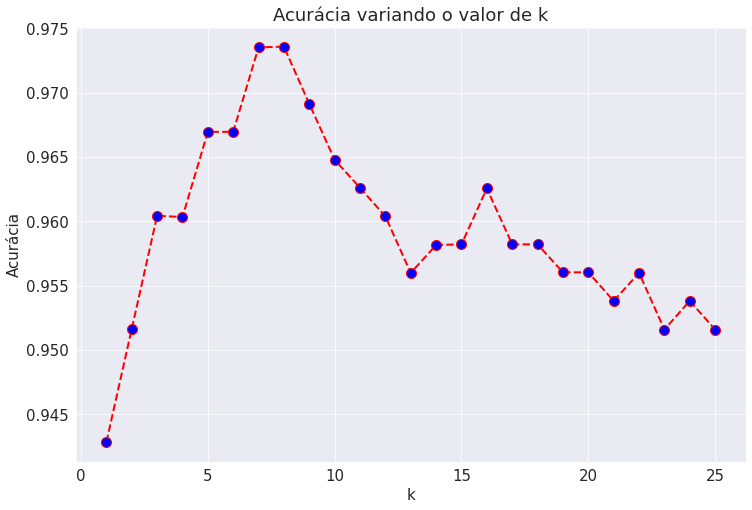

In [9]:
'''
obter o melhor valor de k para o problema em questão
'''

nkf = 10
vk = [] 
vscore = []
for k in range(1, 26):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model, X_train, y_train, cv=nkf)
    print('k:', k,\
          ', acurácia:', round(cv['test_score'].mean(),3),\
          ', std:', round(cv['test_score'].std(),3))
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

best_k = np.argmax(vscore)+1
print(f'\nMelhor k: {best_k}')

plt.figure(figsize=(12, 8))  
plt.plot(vk, vscore, 
         color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Acurácia variando o valor de k')  
plt.xlabel('k', fontsize = 15)
plt.ylabel('Acurácia', fontsize = 15)
plt.show()

In [10]:
'''
treinar e avaliar o modelo com o melhor valor de k obtido
'''

knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
score = round(accuracy_score(y_pred, y_test),3)
print(f'Acurácia: {score}')

Acurácia: 0.956


<h1 style="background-color:#084d6e;font-family:newtimeroman;font-size:300%;color:white;text-align:center;border-radius: 15px 50px">Exercício 5 (Extra)</h1>

---

De maneira complementar ao exercício anterior, você deve:
   * verificar a separação dos dados no plano utilizando as variáveis ```mean radius``` e ```mean texture```;
   * comparar as diferentes regiões de separação criadas através do *plot* das mesmas. Utilize as mesmas variáveis do item anterior para fazer o plot e os seguintes valores para k: ```[1,3,7,8,9]```
   
---
**Resposta:**

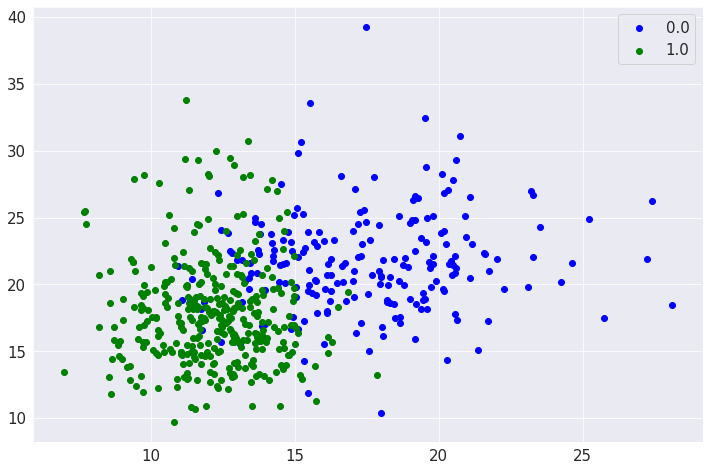

In [12]:
'''
verificar a separação dos dados no plano utilizando as variáveis duas variáveis iniciais
'mean radius' e 'mean texture'
'''


X = df.drop(columns='target').to_numpy()
y = df['target'].to_numpy()

class_labels = np.unique(y)
colors = ['blue', 'green']
aux = 0

plt.figure(figsize=(12,8))
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], 
                color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

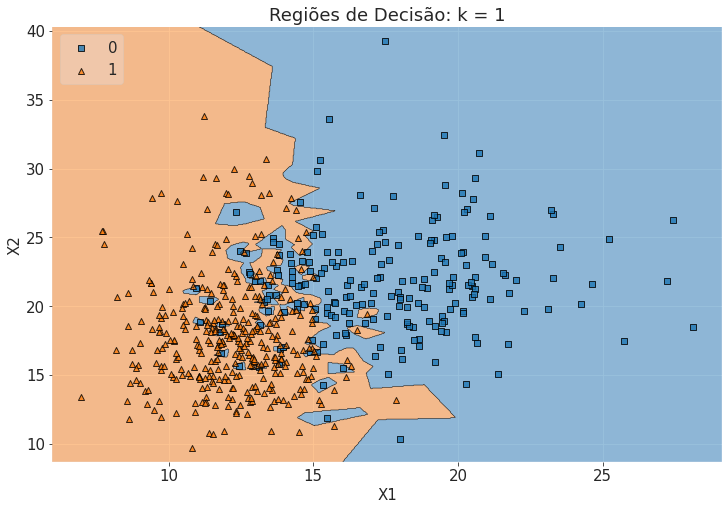

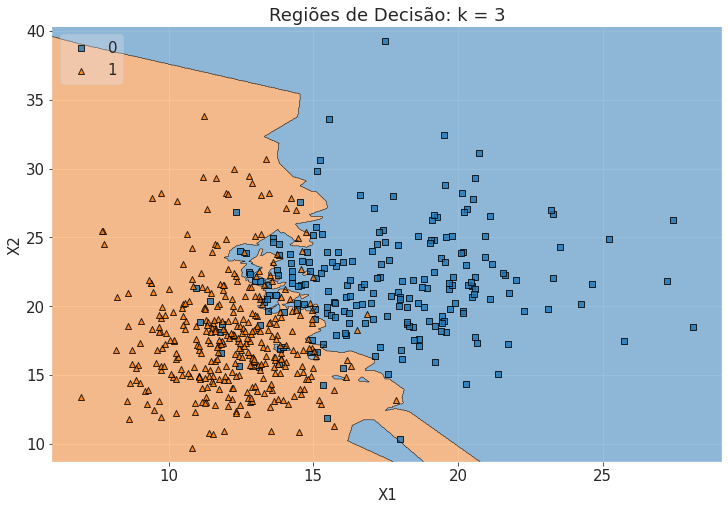

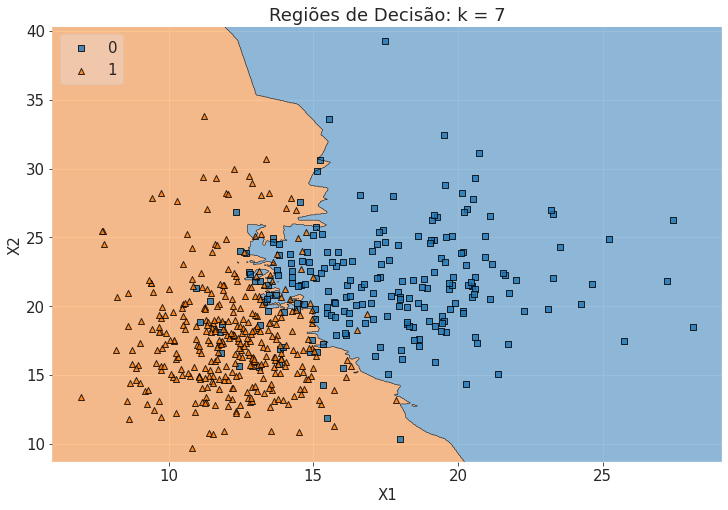

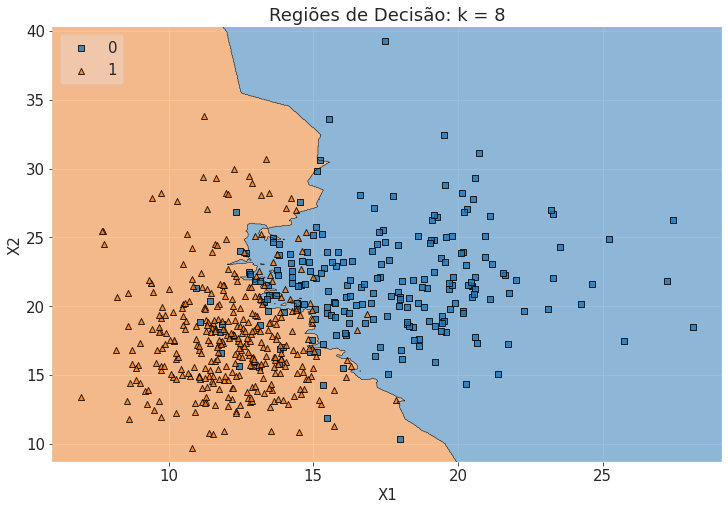

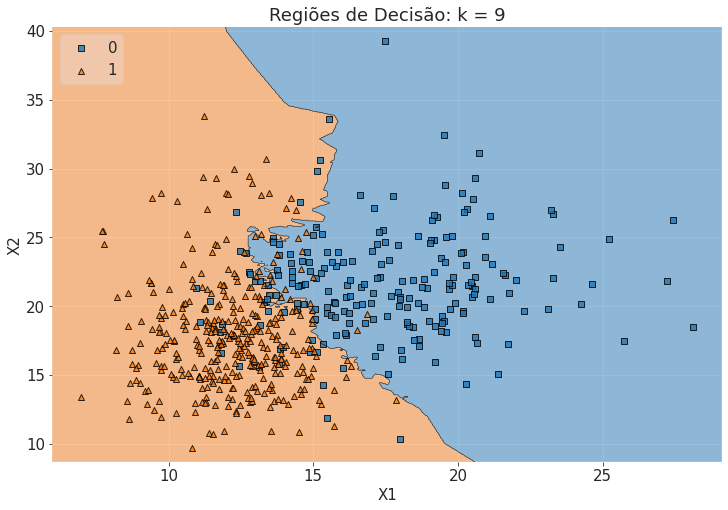

In [13]:
'''
comparar as diferentes regiões de separação
'''

vk = [1,3,7,8,9]
for k in vk:
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X[:,:2], y)
    
    plt.figure(figsize=(12,8))
    plot_decision_regions(X[:,:2], y.astype('int'), clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Regiões de Decisão: k = '+str(k))
    plt.show()